In [1]:
%load_ext autoreload
%autoreload 2

### **Important:**  
As in the last notebook, in the next cell you need to update the `your_username` variable with **Your Username** (between the single quotes).  After you have done that, in principle, you should be able to run the notebook all at once instead of cell by cell. 

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [3]:
your_username = os.getcwd().split('/')[5]
print(f'Your automatically extracted username is: {your_username}.'
    ' If it is incorrect, please mannually reset it.')

Your automatically extracted username is: ywx649999311. If it is incorrect, please mannually reset it.


Import the sims_maf modules needed.

In [4]:
# import rubin_sim python modules
import rubin_sim.maf.db as db
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.metricBundles as mb
import rubin_sim.maf.plots as plots
import rubin_sim.maf.batches as batches

# import convenience functions for MAF analysis on SciServer
from opsimUtils import *

# print version
import rubin_sim
rubin_sim.__version__

'0.10.1.dev62+gbb0801e'

In [5]:
if your_username == '': # do NOT put your username here
    raise Exception('Please provide your username! See the top of the notebook.')

# user provided paths
resultDbPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/'.format(your_username)
metricDataPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/MetricData/'.format(your_username)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

# the following line will be useful if you did not run MAF on all 75 opsims
runNames = list(resultDbs.keys())

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts = {}

for runName in resultDbs:
    bundleDicts[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

#### **Note:** 
The `metricId` for each metric could vary from opsim to opsim (due to the inconsistency of the proposalId assginment across opsims).

In [8]:
# we see the available metric keys
list(bundleDicts[runNames[0]].keys())

[(1, 'coadd_COSMOS_g'),
 (2, 'coadd_XMM-LSS_g'),
 (3, 'coadd_COSMOS_u'),
 (4, 'coadd_XMM-LSS_u'),
 (5, 'nvisit_COSMOS_g'),
 (6, 'nvisit_XMM-LSS_g'),
 (7, 'nvisit_COSMOS_u'),
 (8, 'nvisit_XMM-LSS_u')]

In [9]:
help(getSummary)

Help on function getSummary in module opsimUtils:

getSummary(resultDbs, metricName, summaryStatName, runNames=None, pandas=True, **kwargs)
    Return one summary statstic for opsims (included in the resultDbs) on a
    particualr metric given some constraints.
    
    Args:
        resultDbs(dict): A dictionary of resultDbs, keys are run names.
        metricName(str): The name of the metric to get summary statistic for.
        summaryStatName(str): The name of the summary statistic get (e.g., Median)
        runNames(list): A list of runNames to retrieve summary stats, if not
            all in resultDbs.
        pandas (bool): Whether to return result in pandas dataframe, otherwise a dictionary
            of numpy record arrays.
    
    Returns:
        stats(dict): Each element is a list of summary stats for the corresponding
            opSim run indicated by the key. This list could has a size > 1, given
            that we can run one metric with different sql constraints.



In [10]:
getSummary(resultDbs, 'coadd_COSMOS_g', 'Median', pandas=True)

,metricId,summaryName,metricName,slicerName,metricInfoLabel,summaryMetric,summaryValue,runName
0,1,Median coadd_COSMOS_g g HealpixSlicer,coadd_COSMOS_g,HealpixSlicer,g,Median,28.470158,baseline_v2.0_10yrs
1,1,Median coadd_COSMOS_g g HealpixSlicer,coadd_COSMOS_g,HealpixSlicer,g,Median,28.450620,baseline_v2.1_10yrs
2,1,Median coadd_COSMOS_g g HealpixSlicer,coadd_COSMOS_g,HealpixSlicer,g,Median,28.448136,bluer_indx0_v2.0_10yrs
3,1,Median coadd_COSMOS_g g HealpixSlicer,coadd_COSMOS_g,HealpixSlicer,g,Median,28.468614,bluer_indx1_v2.0_10yrs


### 2. Visualize Coadd Metric

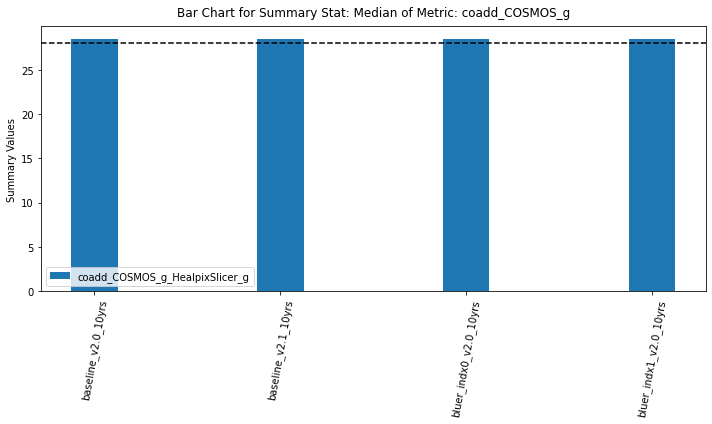

In [11]:
plotSummaryBar(resultDbs, 'coadd_COSMOS_g', 'Median', slicerName = 'HealpixSlicer', axhline=28.7)

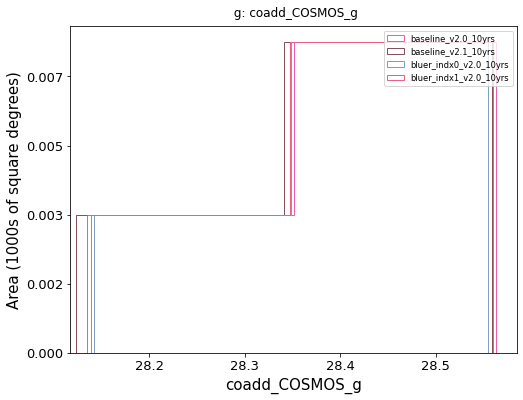

In [12]:
plotHist(bundleDicts, (1, 'coadd_COSMOS_g'), axvline=28.7)

85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625


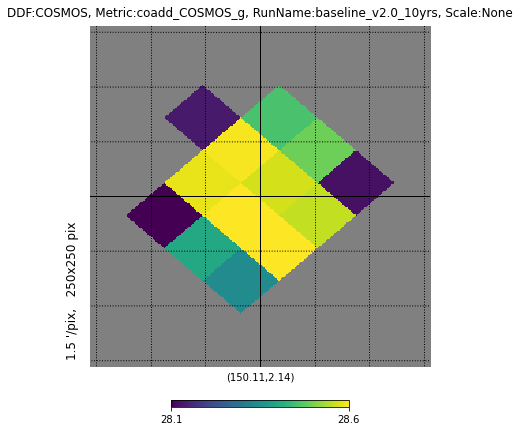

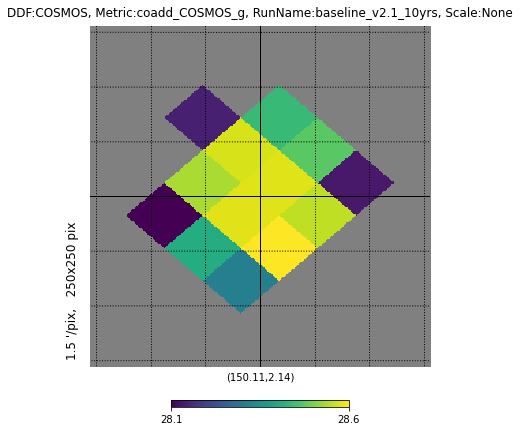

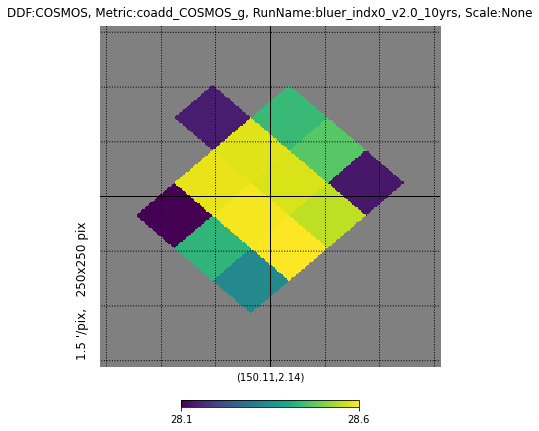

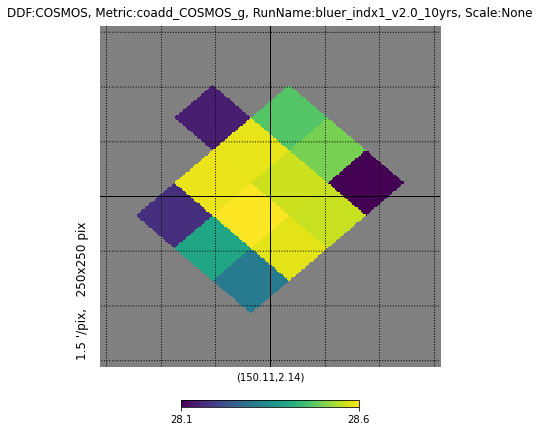

In [14]:
# to get exact metricKey for each metric across different opsims
metricName = 'coadd_COSMOS_g'
summary = getSummary(resultDbs, metricName, 'Median', pandas=True)

# loop over all opsims and make plots
for run in runNames:
    row = summary[summary.runName == run]
    metricKey = (int(row.metricId), metricName)
    plotSky_DDF(bundleDicts[run][metricKey], 'COSMOS')

### 3. Visualize Nvisit Metric
The following basically repeats what were done for the coadd metric.

In [15]:
getSummary(resultDbs, 'nvisit_COSMOS_g', 'Median', pandas=True)

,metricId,summaryName,metricName,slicerName,metricInfoLabel,summaryMetric,summaryValue,runName
0,5,Median nvisit_COSMOS_g g HealpixSlicer,nvisit_COSMOS_g,HealpixSlicer,g,Median,1800.0,baseline_v2.0_10yrs
1,5,Median nvisit_COSMOS_g g HealpixSlicer,nvisit_COSMOS_g,HealpixSlicer,g,Median,1753.0,baseline_v2.1_10yrs
2,5,Median nvisit_COSMOS_g g HealpixSlicer,nvisit_COSMOS_g,HealpixSlicer,g,Median,1772.0,bluer_indx0_v2.0_10yrs
3,5,Median nvisit_COSMOS_g g HealpixSlicer,nvisit_COSMOS_g,HealpixSlicer,g,Median,1805.0,bluer_indx1_v2.0_10yrs


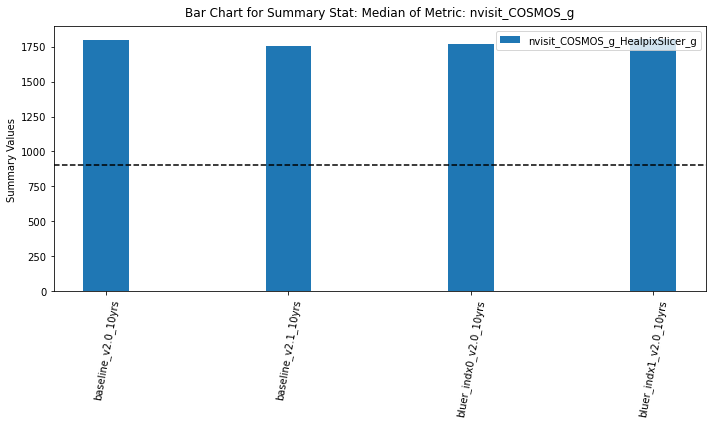

In [16]:
plotSummaryBar(resultDbs, 'nvisit_COSMOS_g', 'Median', \
               slicerName = 'HealpixSlicer', axhline=900)

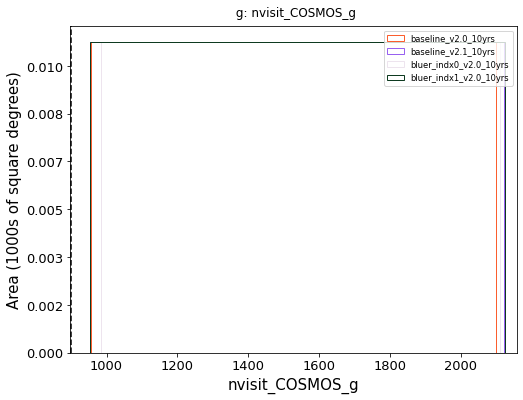

In [17]:
plotHist(bundleDicts, (5, 'nvisit_COSMOS_g'), axvline=900)

85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625


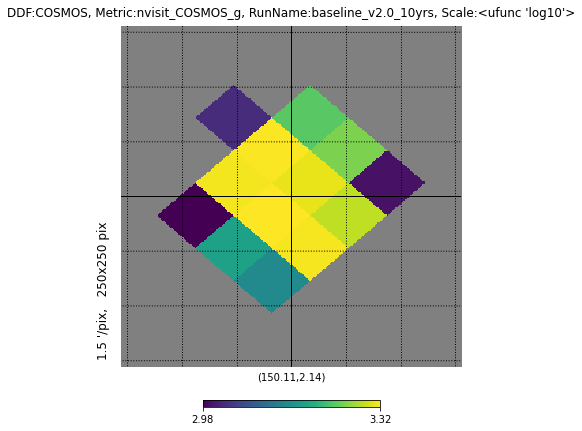

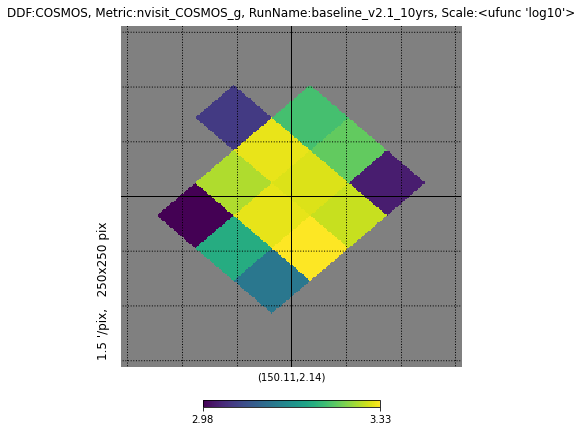

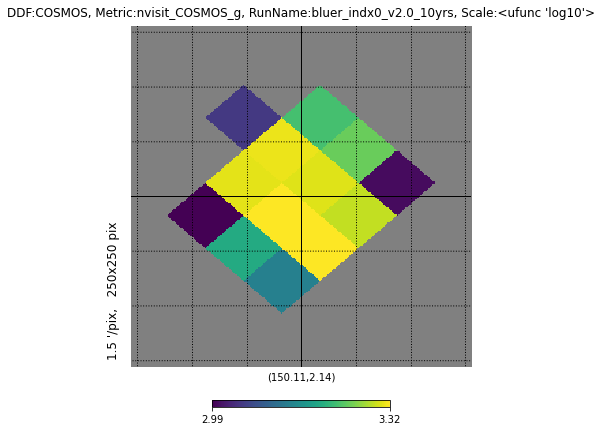

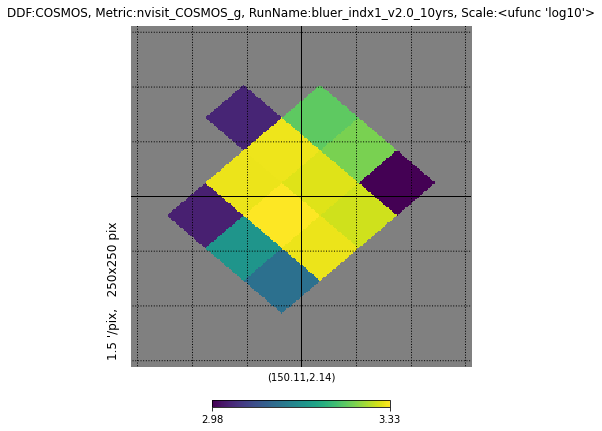

In [18]:
# to get exact metricKey for each metric across different opsims
metricName = 'nvisit_COSMOS_g'
summary = getSummary(resultDbs, metricName, 'Median', pandas=True)

# loop over all opsims and make plots
for run in runNames:
    row = summary[summary.runName == run]
    metricKey = (int(row.metricId), metricName)
    # specifiy logscale for better visualization
    plotSky_DDF(bundleDicts[run][metricKey], 'COSMOS', scale=np.log10)